# Déplacement d'équilibre : cas du procédé Haber-Bosch
 $$\require{mhchem}$$ 
 
 $\ce{3H2 (g) + N2 (g) <=> 2NH3 (g)}$
 

In [1]:
# par Brian BERNARD , en cas de questions me contacter à l'adresse suivante : brian.bernard@ens-paris-saclay.fr

%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import polynomial as P

verbose = False #détaille ou non le calcu

def get_sub(x): 
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s)) 
    return x.translate(res) 


"""
notes préliminaires : pour cette étude de N2+3H2 = 2NH3, tous gazeux : 
Delta_r_G = R*T ln(Q/K) 
Delta_r_G = Delta_r_H - T*Delta_r_S
ΔrH°298 = – 92,2 kJ/mole
ΔrS°298 = – 0.189 kJ/mole
"""

def avancement(K,nH,nN,nNH,nHe,Ptot):
    """ K = (nNH+2ksi)² ntot²/(Ptot² *(nN-ksi)*(nH-3ksi)**3) , Ptot en bar
    On détermine alors les racines de ce polynôme constituant un avancement acceptable physiquement"""
    ntot = nH+nN+nNH+nHe
    A = K*(Ptot**2)#intermédiaire de calcul
    B = ntot #intermédiaire de calcul, pas au carré car mis au carré dans polypow
    
    coeff = P.polyadd(P.polymul([A,-A*nN],P.polypow([-3,nH],3)),P.polymul(P.polypow([B*2,B*nNH],2),P.polypow([-2,ntot],2)))
    #coeff = np.polynomial.polynomial.polysub(multiplypoly([-A,A*nN],powpoly([-3,nH],3)),powpoly([B*2,B*nNH],2))
    #coeff = [-1, -3*nH*A-nN*A, -4*B+3*nH*nN*A+3*A*nH*nH,-2*B*nNH-3*A*nN*nH*nH-A*nH*nH*nH,-B*nNH*nNH+A*((nH)**3)*nN]
    racinescmplx = np.roots(coeff).tolist()
    racinescplx = [complex(round(k.real,8),round(k.imag,8)) for k in racinescmplx]
    racines = [np.real(n) for n in racinescplx if np.imag(n) == 0]
    
    if verbose :
        print(racinescplx)
    
    racinepos = [k for k in racines if (k>-nNH/2  and k< min(nH/3,nN))] #compensation erreurs flottantes, ou pas?
    if racinepos == [] :
        print("Erreur : l'équation polynomiale d'équilibre n'a pas de racines réelles acceptables")
        print(racinepos)
        return(0)
    elif len(racinepos)>1:
        print("Erreur : l'équation polynomiale d'équilibre a pluss d'une racine acceptable")
        print(racinepos)
        return(racinepos[0])
    else :
        """if racinepos[0]> min(nH/3,nN) :
            return(min(nH/3,nN))"""
        return(racinepos[0])
    

def f(T,Ptot,nH2,nN2,nNH3,nHe):
    
        
    Delta_r_G = -92.2+T*0.189
    print("ΔrG° (T)= ",round(-92.2+T*0.189,2),"kJ/mol")
    K = np.exp(-Delta_r_G*1000/(8.314*T))
    print("K° (T)= ",round(K,4))
    
    ksi = avancement(K,nH2,nN2,nNH3,nHe,Ptot)
    print("avancement = ", ksi , " mol")
    volumei = ((nHe+nNH3+nN2+nH2)*8.317*T/Ptot)*(10**(3-5))
    volumef = ((nHe+nNH3+nN2+nH2-2*ksi)*8.317*T/Ptot)*(10**(3-5))
    
    print( "état initial ; état d'équilibre : ")
    print('nH2  = ',nH2 ,"; ",round(nH2-3*ksi,2)," mol" )
    print('nN2  = ',nN2 ,"; ",round(nN2-ksi,2) ," mol" )
    print('nNH3 = ',nNH3 ,"; ",round(nNH3+2*ksi,2) ," mol" )
    print('V    = ',round(volumei,0),"; ",round(volumef,0),' L' )
    
    """
    #mise en forme du graphique
    plt.ylim(-0.05*100, 1.05*100)
    plt.ylabel("Proportion (%)")
    plt.xlabel("pH")
    plt.legend()
    plt.show()"""

             
#actualisation de la barre d'actualisation dynamique
interactive_plot = interactive(f, T=(100, 1000,50),Ptot=(1, 190,9),nH2=(0, 10,1),nN2=(0, 10,1),nNH3=(0, 10,1),nHe=(0, 10,1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot




interactive(children=(IntSlider(value=550, description='T', max=1000, min=100, step=50), IntSlider(value=91, d…

In [2]:
#coeff = P.polyadd(P.polymul([A,-A*nN],P.polypow([-3,nH],3)),P.polypow([B*2,B*nNH],2))
print(P.polypow([-1,1],3))

[-1.  3. -3.  1.]


In [2]:
def fampho(pKa1,pKa2):
    plt.figure(2)
    #définition de l'intervalle de points de calcul
    x = np.linspace(0, 14, num=1000)
    
    #calcul et tracé de la proportion en acide
    prop_acide = 100/(1+10**(x-pKa1)+10**(2*x-pKa1-pKa2))
    plt.plot(x, prop_acide,color = 'red',label = "acide") 
    #calcul et tracé de la proportion en amphotère
    plt.plot(x, prop_acide*10**(x-pKa1),color = 'green',label = "amphotère") 
    #calcul et tracé de la proportion en base
    plt.plot(x, prop_acide*10**(2*x-pKa1-pKa2),color = 'blue', label = 'base') 
    
    #mise en forme du graphique
    plt.ylim(-0.05*100, 1.05*100)
    plt.ylabel("Proportion (%)")
    plt.xlabel("pH")
    plt.legend()
    plt.show()
             
#actualisation de la barre d'actualisation dynamique
interactive_plot = interactive(fampho, pKa1=(2, 12,0.3333),pKa2=(2, 12,0.3333))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=6.999499999999999, description='pKa1', max=12.0, min=2.0, step=0.3333)…

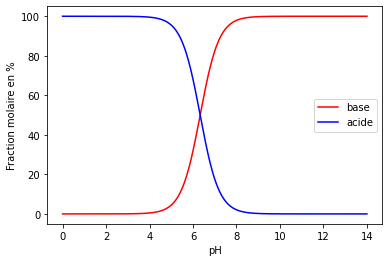

In [29]:
f(6.33)

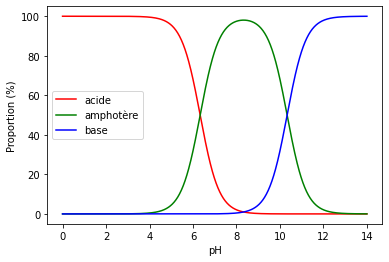

In [30]:
fampho(6.33,10.33)